In [1]:
# 30. 形態素解析結果の読み込み
result = []
with open('data/neko.txt.mecab', 'r') as f:
    lines = f.readlines()
    sentense = []
    for line in lines:
        if line == 'EOS\n':
            result.append(sentense)
            sentense = []
            continue
        if '\t' not in line:
            continue
        surface, features = line.split('\t')
        features = features.split(',')
        sentense.append({'surface': surface, 'base': features[6], 'pos': features[0], 'pos1': features[1]})

In [2]:
# 30. 形態素解析結果の読み込み
import pandas as pd

df = pd.read_table('./data/neko.txt.mecab', sep='\t|,', header=None, usecols=[0, 1, 2, 7], names=['surface', 'pos', 'pos1', 'base'], skiprows=2)
df.head(10)

# Reference, but fixed before using
# [言語処理100本ノック\-30\(pandas使用\):形態素解析結果の読み込み \- Qiita](https://qiita.com/FukuharaYohei/items/98e3f72d323566c540b9)

/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return func(*args, **kwargs)


,surface,pos,pos1,base
0,記号,一般,*,None
1,EOS,None,None,None
2,記号,一般,*,None
3,EOS,None,None,None
4,記号,空白,*,
5,吾輩,名詞,代名詞,吾輩
6,は,助詞,係助詞,は
7,猫,名詞,一般,猫
8,で,助動詞,*,だ
9,ある,助動詞,*,ある


In [3]:
# 31. 動詞

verbs = df[df['pos'] == '動詞']
verbs.head()

,surface,pos,pos1,base
25,生れ,動詞,自立,生れる
31,つか,動詞,自立,つく
40,し,動詞,自立,する
45,泣い,動詞,自立,泣く
51,し,動詞,自立,する


In [4]:
# 32. 動詞の基本形

verbs_base = verbs['base']
verbs_base.head()

25    生れる
31     つく
40     する
45     泣く
51     する
Name: base, dtype: object

In [5]:
# 33. 「AのB」

def getAnoBorNone(df, index):
    a = df.iloc[index - 1]
    b = df.iloc[index + 1]
    return a['surface'] + 'の' + b['surface'] if a['pos'] == '名詞' and b['pos'] == '名詞' else None

no = df[(df["surface"] == "の") & (df["pos"] == "助詞")]
no.index.map(lambda i: getAnoBorNone(df, i))

Index([    '彼の掌',     '掌の上',    '書生の顔',      None,    'はずの顔',    '顔の真中',
           '穴の中',      None,    '書生の掌',     '掌の裏',
       ...
           '水の面',     '甕の縁',      None,    '甕のふち',      None,     '年の間',
          '自然の力',     '水の中',    '座敷の上', '不可思議の太平'],
      dtype='object', length=7583)

In [6]:
# 34. 名詞の連接
from pandas import Series

def getPartitionId(s: Series) -> Series:
    return (s != s.shift()).cumsum()

df["partitionId"] = getPartitionId(df['pos'])
df["rowNumber"] = df.groupby("partitionId").cumcount()
df

,surface,pos,pos1,base,partitionId,rowNumber
0,記号,一般,*,None,1,0
1,EOS,None,None,None,2,0
2,記号,一般,*,None,3,0
3,EOS,None,None,None,4,0
4,記号,空白,*,,5,0
...,...,...,...,...,...,...
226260,。,記号,句点,。,206641,0
226261,記号,一般,*,None,206642,0
226262,EOS,None,None,None,206643,0
226263,記号,一般,*,None,206644,0


In [7]:
noun = df[df['pos'] == '名詞']
noun.describe()

,partitionId,rowNumber
count,58444.000000,58444.000000
mean,101928.142957,0.208867
std,59162.255245,0.553942
min,6.000000,0.000000
25%,51123.500000,0.000000
50%,101134.000000,0.000000
75%,152195.000000,0.000000
max,206636.000000,9.000000


In [8]:
maxmumNounsCount = noun['rowNumber'].max()

In [9]:
maxmumNounsPartition = noun[noun['rowNumber'] == maxmumNounsCount]

In [10]:
noun[noun['partitionId'].isin(maxmumNounsPartition['partitionId'])]

,surface,pos,pos1,base,partitionId,rowNumber
32939,many,名詞,一般,*,30088,0
32940,a,名詞,一般,*,30088,1
32941,slip,名詞,一般,*,30088,2
32942,',名詞,サ変接続,*,30088,3
32943,twixt,名詞,一般,*,30088,4
32944,the,名詞,一般,*,30088,5
32945,cup,名詞,一般,*,30088,6
32946,and,名詞,一般,*,30088,7
32947,the,名詞,一般,*,30088,8
32948,lip,名詞,一般,*,30088,9


In [11]:
# 35. 単語の出現頻度
df['base'].value_counts().head(10)

の    9194
。    7486
て    6848
、    6772
は    6420
に    6243
を    6071
だ    5972
と    5508
が    5337
Name: base, dtype: int64

<AxesSubplot:>

/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12390 (\N{HIRAGANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from current font.
  fig.canvas.print_fig

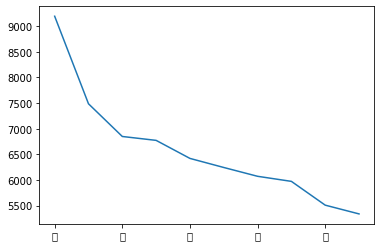

In [12]:
# 36. 頻度上位10語

df['base'].value_counts().head(10).plot()

In [13]:
# 37. 「猫」と共起頻度の高い上位10語

def getSentenseId(s: Series) -> Series:
    return (s.shift() == 'EOS').cumsum()

sentenseId = getSentenseId(df['surface'])
df['sentenseId'] = sentenseId
df.head(30)

,surface,pos,pos1,base,partitionId,rowNumber,sentenseId
0,記号,一般,*,None,1,0,0
1,EOS,None,None,None,2,0,0
2,記号,一般,*,None,3,0,1
3,EOS,None,None,None,4,0,1
4,記号,空白,*,,5,0,2
5,吾輩,名詞,代名詞,吾輩,6,0,2
6,は,助詞,係助詞,は,7,0,2
7,猫,名詞,一般,猫,8,0,2
8,で,助動詞,*,だ,9,0,2
9,ある,助動詞,*,ある,9,1,2


In [14]:
catSeries = df[df['base'] == '猫']
sentensesHaveCat = df[df['sentenseId'].isin(catSeries['sentenseId'])]
sentensesHaveCat.head(30)

,surface,pos,pos1,base,partitionId,rowNumber,sentenseId
4,記号,空白,*,,5,0,2
5,吾輩,名詞,代名詞,吾輩,6,0,2
6,は,助詞,係助詞,は,7,0,2
7,猫,名詞,一般,猫,8,0,2
8,で,助動詞,*,だ,9,0,2
9,ある,助動詞,*,ある,9,1,2
10,。,記号,句点,。,10,0,2
11,記号,一般,*,None,11,0,2
12,EOS,None,None,None,12,0,2
232,その後,名詞,副詞可能,その後,216,0,15


(array([1.0392e+04, 3.9400e+02, 1.5400e+02, 7.1000e+01, 3.9000e+01,
        4.0000e+01, 2.1000e+01, 1.3000e+01, 1.4000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 6.0000e+00, 4.0000e+00, 6.0000e+00,
        4.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

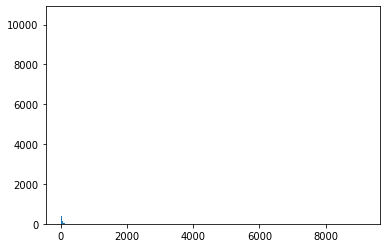

In [15]:
# 38. ヒストグラム

import matplotlib.pyplot as plt

base_counts = df['base'].value_counts()
base_counts_values = base_counts.values
plt.hist(base_counts_values, bins=500) # 出現頻度が1回程度の単語が多すぎて見づらい

<AxesSubplot:>

/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12366 (\N{HIRAGANA LETTER GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
  fig.canvas.print_fig

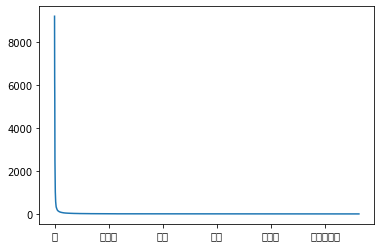

In [16]:
# 39. Zipfの法則

base_counts.plot()

<AxesSubplot:>

/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroga/.ghq/github.com/xhiroga/til/computer-science/nlp/nlp100/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_f

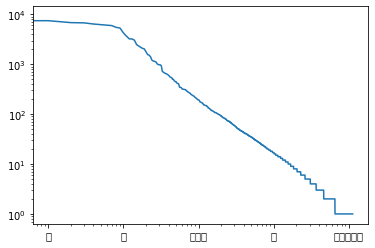

In [17]:
base_counts.plot(logx=True, logy=True)